In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
df=pd.read_csv("/kaggle/input/youtube-new/MXvideos.csv") #csv dosyasını dataframe olarak atama yaparız
df.head() #ilk 5 datayı bize tablo halinde gösterir.

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [3]:
df.info() #data hakkında kısaca bilgi almamızı sağlar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_id             40451 non-null  int64 
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  40451 non-null  bool  
 15  de

In [4]:
df.columns #sütunlara ulaşırız.

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
df.corr() #veriler arasındaki ilişkiyi görmemizi sağlar.

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.100471,-0.109188,-0.019360,-0.045528,-0.013880,0.047059,-0.021599
views,-0.100471,1.000000,0.798751,0.556964,0.677812,0.012065,0.003074,-0.002228
likes,-0.109188,0.798751,1.000000,0.443179,0.845787,-0.015604,-0.024683,-0.002543
dislikes,-0.019360,0.556964,0.443179,1.000000,0.634587,-0.003883,-0.008607,-0.000475
comment_count,-0.045528,0.677812,0.845787,0.634587,1.000000,-0.015346,-0.017231,-0.001736
comments_disabled,-0.013880,0.012065,-0.015604,-0.003883,-0.015346,1.000000,0.247727,-0.002555
ratings_disabled,0.047059,0.003074,-0.024683,-0.008607,-0.017231,0.247727,1.000000,-0.003075
video_error_or_removed,-0.021599,-0.002228,-0.002543,-0.000475,-0.001736,-0.002555,-0.003075,1.000000


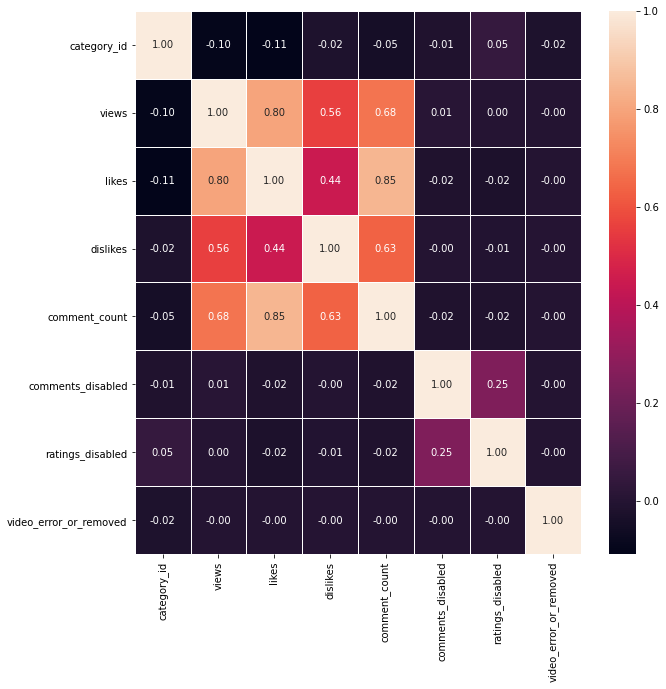

In [6]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()  #korelasyon haritası ilşkileri daha kolay anlamamızı sağlar.Eksili değerler ters ilişkiyi 0-1 arasındaki ilişkiler de renklendirmeye göre ilişkinin değerini verir.

In [7]:
df[["views","likes","dislikes"]] #aynı şekilde birden fazla sütuna da ulaşabiliriz.

,views,likes,dislikes
0,310130,4182,361
1,104972,271,174
2,136064,10105,266
3,96153,378,171
4,499965,57781,681
...,...,...,...
40446,653114,65639,547
40447,121674,3558,58
40448,14067,538,6
40449,22898,94,11


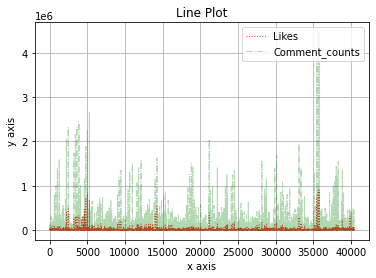

In [8]:
df.comment_count.plot(kind = 'line', color = 'r',label = 'Likes',linewidth=1,alpha = 0.8,grid = True,linestyle = ':')
df.likes.plot(color = 'g',label = 'Comment_counts',linewidth=1, alpha = 0.3,grid = True,linestyle = '-.')
plt.legend(loc='upper right')    
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')  #seçilen iki değişkeni x ve y ekseni olarak tanımlayarak yorumlayabilmemiz için çizgi grafiği oluşturur.
plt.show()

Text(0.5, 1.0, 'Scatter Plot')

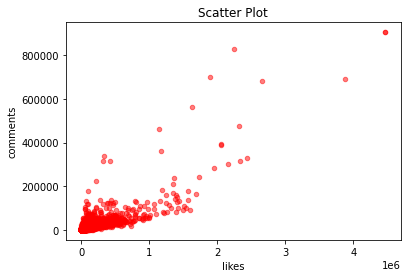

In [9]:
df.plot(kind='scatter', x='likes', y='comment_count',alpha = 0.5,color = 'red')
plt.xlabel('likes')             
plt.ylabel('comments')
plt.title('Scatter Plot')    #seçilen verilerin saçılımını ve yoğunlaşma aralığını görebiliriz.

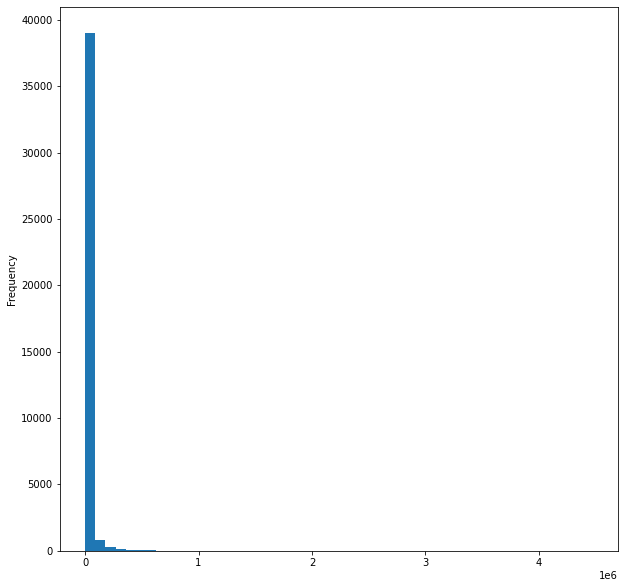

In [10]:
df.likes.plot(kind = 'hist',bins = 50,figsize = (10,10))
plt.show()

In [11]:
df.likes.plot(kind = 'hist',bins = 50,figsize = (10,10))
plt.clf()

<Figure size 720x720 with 0 Axes>

In [12]:
x=df["likes"]>1000000
df[x]  #beğeni sayısı 1000000 üzeri olan verileri gösterir

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
812,TyHvyGVs42U,17.18.11,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",18558186,1002598,32181,59945,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,“Échame La Culpa” disponible ya en todas las p...
1005,TyHvyGVs42U,17.19.11,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",29943556,1388770,54753,79828,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,“Échame La Culpa” disponible ya en todas las p...
1248,TyHvyGVs42U,17.20.11,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",38647842,1600413,68558,91409,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,“Échame La Culpa” disponible ya en todas las p...
2207,kTlv5_Bs8aw,17.25.11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",13945717,2055217,23891,395562,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...
2445,kTlv5_Bs8aw,17.26.11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",20573162,2320666,33228,477215,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...
3196,6ZfuNTqbHE8,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735975,21975,241247,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3396,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56370607,2157755,34079,303170,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3604,6ZfuNTqbHE8,17.02.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",66637636,2331375,41155,316180,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
3871,6ZfuNTqbHE8,17.03.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",74789251,2444976,46173,330715,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
4596,FlsCjmMhFmw,17.07.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24787622,1149259,483969,461983,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


In [13]:
df[np.logical_and(df['likes']>1000000, df['dislikes']>1000000 )] #beğeni ve beğenmeme sayısı 1000000 üzeri olan verileri gösterir

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4998,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251864,1127834,827784,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5261,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100912384,2656698,1353667,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


In [14]:
df[(df['likes']>2000000) & (df['dislikes']>1000000)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4998,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251864,1127834,827784,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5261,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100912384,2656698,1353667,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


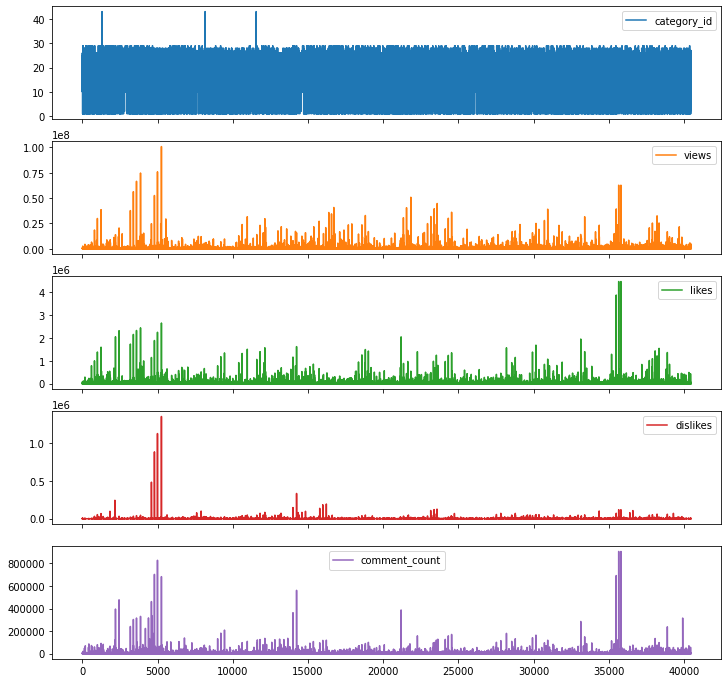

In [15]:
df.plot(subplots = True, figsize=(12,12))
plt.show()  #her değişkeni ayrı ayrı grafik haline getirir.

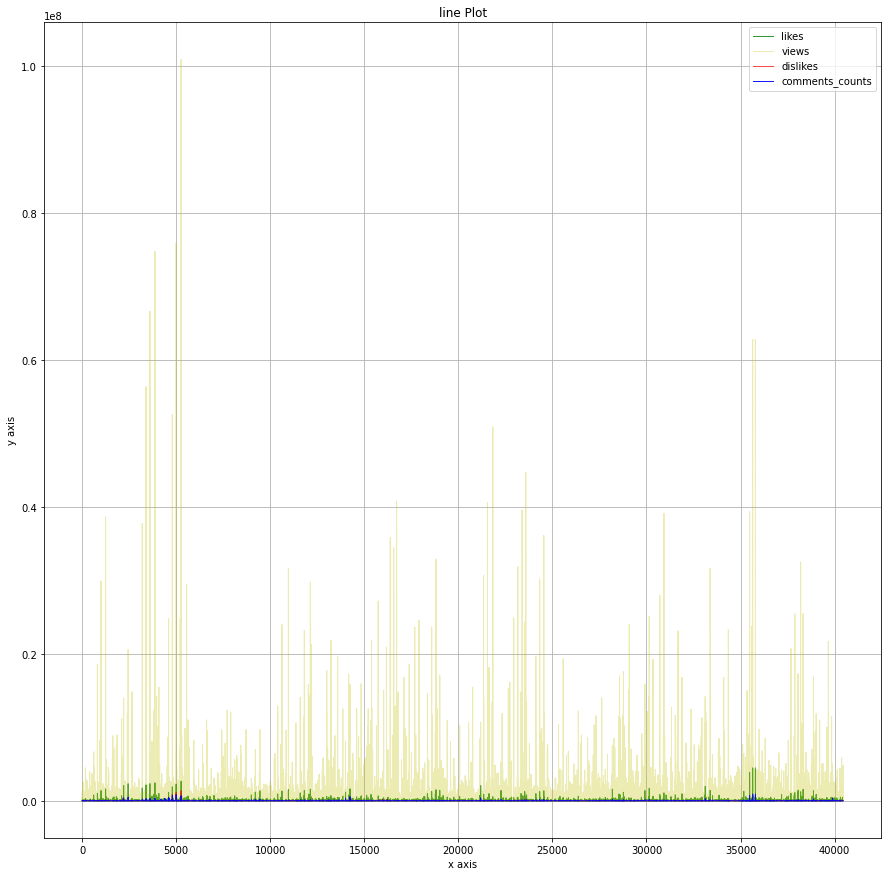

In [16]:
df.likes.plot(kind="line", color="g", label="likes", linewidth=1, alpha=0.8, grid=True, figsize=(15,15))
df.views.plot(kind="line", color="y", label="views", linewidth=1, alpha=0.3, grid=True)
df.dislikes.plot(kind="line", color="r", label="dislikes", linewidth=1, alpha=0.7, grid=True)
df.comment_count.plot(kind="line", color="b", label="comments_counts", linewidth=1, alpha=0.9, grid=True)
plt.legend(loc="upper right")
plt.xlabel("x axis")         
plt.ylabel("y axis")
plt.title("line Plot")       
plt.show()  #çok fazla değişkeni tek grafikte gösterebiliriz.

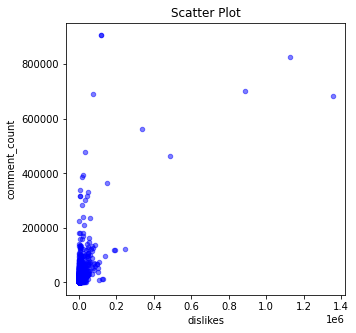

In [17]:
df.plot(kind="scatter", x="dislikes", y="comment_count", alpha=0.5, color="blue", figsize=(5,5))
plt.xlabel("dislikes")    
plt.ylabel("comment_count")
plt.title("Scatter Plot") 
plt.show()

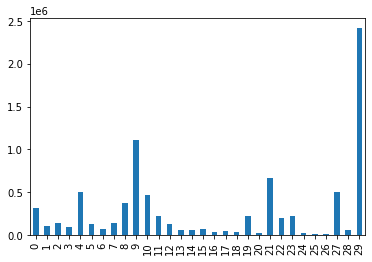

In [18]:
df.views.head(30).plot(kind="bar")  #ilk 30 veriyi bar grafiği olarak gösterir.
plt.show()

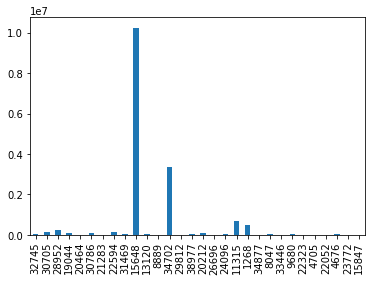

In [19]:
df.views.sample(30).plot(kind="bar")
plt.show()  #son 30 veriyi bar grafiği olarak gösterir.